# HomeWork 1- 17350796

It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, 
as declared to the Revenue Commissioners for stamp duty purposes
csv file = ppr-17350796.csv

Question 1: Preparing the data from CSV



In [224]:
import pandas as pd

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

Reading in the data and displaying the first 5 rows:


In [225]:
df = pd.read_csv('ppr-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Show data frame first few rows
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,06/05/2016,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,"€630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,22/12/2014,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,"€281,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,22/05/2020,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,"€560,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/11/2014,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,"€46,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/11/2018,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,"€204,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


Displaying the last 5 rows

In [226]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,15/12/2017,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,18/12/2012,"17 the court, cypress downs, templeogue",NaN,Dublin,"€605,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,14/12/2016,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,"€46,666.67",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,19/06/2017,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,"€176,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/11/2017,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,"€86,738.06",Yes,No,Second-Hand Dwelling house /Apartment,NaN


Display number of rows and columns- 10000 = Rows, 9 = columns

In [227]:
# number of rows and columns
df.shape

(10000, 9)

The data is currently all read as object. The data need to be change to the appropriate data type

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1860 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1029 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Looking at the column names for errrors 

In [229]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [230]:
# Converting price to float, you need to remove all symbols from strings for the command to work. 



df['Price (€)'] = df['Price (€)'].str.replace(',', '')


df['Price (€)'] = df['Price (€)'].str.replace('€', '')

df['Price (€)'] = df['Price (€)'].astype(float)

df[['Price (€)']]

,Price (€)
0,630000.00
1,281000.00
2,560000.00
3,46000.00
4,204000.00
...,...
9995,200000.00
9996,605000.00
9997,46666.67
9998,176000.00


These object features have been changed to categorical as they each describe unique values

In [231]:


df['County'] = df['County'].astype('category')
df['Description of Property'] = df['Description of Property'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('category')
df['Property Size Description'] = df['Property Size Description'].astype('category')
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')






df.dtypes

Date of Sale (dd/mm/yyyy)      object
Address                        object
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
dtype: object

In [232]:
# converting dates to date data type
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'])

df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                              object
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

Looking for duplicate rows and columns

In [233]:
# There is 20 non unique addresses 
df.nunique()

Date of Sale (dd/mm/yyyy)    2759
Address                      9980
Postal Code                    22
County                         26
Price (€)                    2285
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         3
Property Size Description       4
dtype: int64

In [234]:
df.isnull().sum()

Date of Sale (dd/mm/yyyy)       0
Address                         0
Postal Code                  8140
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8971
dtype: int64

The columm 'Property Size Description' has been dropped due to over 50% of the data is missing and cannot be inferred with accuracy

In [235]:
df.drop('Property Size Description', axis=1, inplace=True)
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property
9995,2017-12-15,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment
9997,2016-12-14,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment
9998,2017-06-19,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment
9999,2017-02-11,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment


In [236]:
df['Not Full Market Price'].value_counts(dropna=False)

No     9552
Yes     448
Name: Not Full Market Price, dtype: int64

There is some logical integrity issues with the data. Some post codes do not match the post codes in their addresses.

In [237]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property
0,Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment
1,Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment
2,NaN,Dublin,No,No,Second-Hand Dwelling house /Apartment
3,NaN,Kilkenny,No,No,Second-Hand Dwelling house /Apartment
4,NaN,Clare,No,No,Second-Hand Dwelling house /Apartment


In [238]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77
Dublin 6       66
Dublin 22      54
Dublin 2       34
Dublin 20      25
Dublin 17      24
Dublin 10      20
Dublin 6w      18
Name: Postal Code, dtype: int64

County
Dublin       3193
Cork         1099
Galway        502
Kildare       483
Meath         399
Wexford       363
Limerick      348
Wicklow       317
Louth         288
Kerry         285
Tipperary     283
Donegal       274
Mayo          259
Waterford     245
Clare         240
Westmeath     174
Laois         163
Cavan         153
Sligo         148
Roscommon     143
Kilkenny      133
Carlow        124
Offaly        119
Leitrim        99
Longford       90
Monaghan       76
Name: County, dtype: int64

Not Full Market Price
No     9552
Yes

'Description of Property' shows 3 unique properties. "Teach/Árasán Cónaithe Atháimhe" is the Irish translation of "Second-Hand Dwelling house /Apartment". While it is important that Irish people practice their native language for the purpose of data analytics it makes sense to change this to the english category for consistency. 

In [239]:
# getting index of where the illogical data is 
df.index[df['Description of Property'] == 'Teach/Árasán Cónaithe Atháimhe'].tolist()

[5686]

In [240]:
# replacing with english translation
df.at[5686,'Description of Property']='Second-Hand Dwelling house /Apartment'


In [241]:
df['Description of Property'].value_counts(dropna=False)

Second-Hand Dwelling house /Apartment    8364
New Dwelling house /Apartment            1636
Teach/Árasán Cónaithe Atháimhe              0
Name: Description of Property, dtype: int64

In [242]:
df[category_columns].describe().T

,count,unique,top,freq
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364


# Describing Numeric Types

In [279]:
numeric_columns = df.select_dtypes(['float64']).columns
numeric_columns

Index(['Date of Sale (dd/mm/yyyy)', 'Price (€)'], dtype='object')

In [284]:
df.describe(datetime_is_numeric=True).T


,count,mean,min,25%,50%,75%,max,std
Date of Sale (dd/mm/yyyy),10000,2017-01-19 02:06:08.640000,2010-01-02 00:00:00,2014-11-07 00:00:00,2017-06-02 12:00:00,2019-08-04 00:00:00,2022-12-01 00:00:00,NaN
Price (€),10000.0,260260.702676,5500.0,120000.0,200000.0,308370.08,17151248.0,390170.322939


Summary stats for numeric data Price (€)

In [281]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


In [282]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Date of Sale (dd/mm/yyyy),2759
Price (€),2285


In [246]:
df['Address'].describe()

count                                     10000
unique                                     9980
top       13 CATHEDRAL WALK, BLACKPOOL, CO CORK
freq                                          2
Name: Address, dtype: object

In [247]:
df.to_csv('updated-ppr-17350796.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'updated-ppr-17350796.csv'

In [248]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77
Dublin 6       66
Dublin 22      54
Dublin 2       34
Dublin 20      25
Dublin 17      24
Dublin 10      20
Dublin 6w      18
Name: Postal Code, dtype: int64

County
Dublin       3193
Cork         1099
Galway        502
Kildare       483
Meath         399
Wexford       363
Limerick      348
Wicklow       317
Louth         288
Kerry         285
Tipperary     283
Donegal       274
Mayo          259
Waterford     245
Clare         240
Westmeath     174
Laois         163
Cavan         153
Sligo         148
Roscommon     143
Kilkenny      133
Carlow        124
Offaly        119
Leitrim        99
Longford       90
Monaghan       76
Name: County, dtype: int64

Not Full Market Price
No     9552
Yes

In [249]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


Postal Code
NaN          0.8140
Dublin 15    0.0232
Dublin 18    0.0143
Dublin 9     0.0119
Dublin 8     0.0115
Dublin 24    0.0114
Dublin 4     0.0109
Dublin 12    0.0104
Dublin 16    0.0096
Dublin 11    0.0093
Dublin 7     0.0088
Dublin 13    0.0085
Dublin 14    0.0084
Dublin 3     0.0082
Dublin 5     0.0078
Dublin 1     0.0077
Dublin 6     0.0066
Dublin 22    0.0054
Dublin 2     0.0034
Dublin 20    0.0025
Dublin 17    0.0024
Dublin 10    0.0020
Dublin 6w    0.0018
Name: Postal Code, dtype: float64

County
Dublin       0.3193
Cork         0.1099
Galway       0.0502
Kildare      0.0483
Meath        0.0399
Wexford      0.0363
Limerick     0.0348
Wicklow      0.0317
Louth        0.0288
Kerry        0.0285
Tipperary    0.0283
Donegal      0.0274
Mayo         0.0259
Waterford    0.0245
Clare        0.0240
Westmeath    0.0174
Laois        0.0163
Cavan        0.0153
Sligo        0.0148
Roscommon    0.0143
Kilkenny     0.0133
Carlow       0.0124
Offaly       0.0119
Leitrim      0.0099
Longf

In [250]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


Postal Code
Dublin 15    0.124731
Dublin 18    0.076882
Dublin 9     0.063978
Dublin 8     0.061828
Dublin 24    0.061290
Dublin 4     0.058602
Dublin 12    0.055914
Dublin 16    0.051613
Dublin 11    0.050000
Dublin 7     0.047312
Dublin 13    0.045699
Dublin 14    0.045161
Dublin 3     0.044086
Dublin 5     0.041935
Dublin 1     0.041398
Dublin 6     0.035484
Dublin 22    0.029032
Dublin 2     0.018280
Dublin 20    0.013441
Dublin 17    0.012903
Dublin 10    0.010753
Dublin 6w    0.009677
Name: Postal Code, dtype: float64

County
Dublin       0.3193
Cork         0.1099
Galway       0.0502
Kildare      0.0483
Meath        0.0399
Wexford      0.0363
Limerick     0.0348
Wicklow      0.0317
Louth        0.0288
Kerry        0.0285
Tipperary    0.0283
Donegal      0.0274
Mayo         0.0259
Waterford    0.0245
Clare        0.0240
Westmeath    0.0174
Laois        0.0163
Cavan        0.0153
Sligo        0.0148
Roscommon    0.0143
Kilkenny     0.0133
Carlow       0.0124
Offaly       0.0119
L

In [251]:
df.duplicated().sum()

0

In [252]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [253]:
df[category_columns].describe().T

,count,unique,top,freq
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364


In [254]:
df_category_mode = pd.DataFrame(index = df[category_columns].describe().T.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Postal Code,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Not Full Market Price,NaN,NaN,NaN,NaN,NaN,NaN
VAT Exclusive,NaN,NaN,NaN,NaN,NaN,NaN
Description of Property,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


Postal Code
Dublin 15    232
Dublin 18    143
Dublin 9     119
Dublin 8     115
Dublin 24    114
Dublin 4     109
Dublin 12    104
Dublin 16     96
Dublin 11     93
Dublin 7      88
Dublin 13     85
Dublin 14     84
Dublin 3      82
Dublin 5      78
Dublin 1      77
Dublin 6      66
Dublin 22     54
Dublin 2      34
Dublin 20     25
Dublin 17     24
Dublin 10     20
Dublin 6w     18
Name: Postal Code, dtype: int64
CategoricalIndex(['Dublin 15', 'Dublin 18', 'Dublin 9', 'Dublin 8',
                  'Dublin 24', 'Dublin 4', 'Dublin 12', 'Dublin 16',
                  'Dublin 11', 'Dublin 7', 'Dublin 13', 'Dublin 14',
                  'Dublin 3', 'Dublin 5', 'Dublin 1', 'Dublin 6', 'Dublin 22',
                  'Dublin 2', 'Dublin 20', 'Dublin 17', 'Dublin 10',
                  'Dublin 6w'],
                 categories=['Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12', 'Dublin 13', 'Dublin 14', 'Dublin 15', 'Dublin 16', ...], ordered=False, dtype='category')

County
Dublin       319

In [256]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Postal Code,Dublin 15,232,0.124731,Dublin 18,143,0.076882
County,Dublin,3193,0.3193,Cork,1099,0.1099
Not Full Market Price,No,9552,0.9552,Yes,448,0.0448
VAT Exclusive,No,8399,0.8399,Yes,1601,0.1601
Description of Property,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636


In [257]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Postal Code,81.4
County,0.0
Not Full Market Price,0.0
VAT Exclusive,0.0
Description of Property,0.0


In [258]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df[category_columns].describe().T, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
Postal Code,1860,22,Dublin 15,232,Dublin 15,232,0.124731,Dublin 18,143,0.076882,81.4
County,10000,26,Dublin,3193,Dublin,3193,0.3193,Cork,1099,0.1099,0.0
Not Full Market Price,10000,2,No,9552,No,9552,0.9552,Yes,448,0.0448,0.0
VAT Exclusive,10000,2,No,8399,No,8399,0.8399,Yes,1601,0.1601,0.0
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636,0.0


# Visualisation- Data Quality Report

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

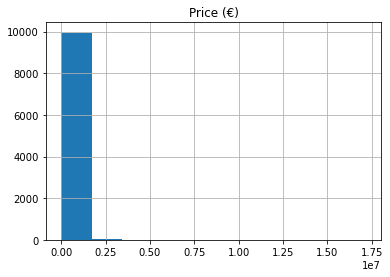

In [259]:
df[numeric_columns].hist()

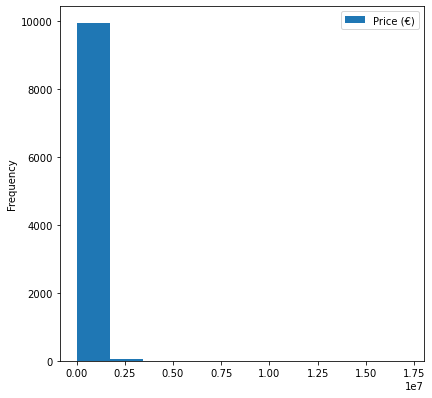

In [260]:
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,30), layout=(4,4), sharex=False, sharey=False)
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-histograms_all_1-1.pdf')

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

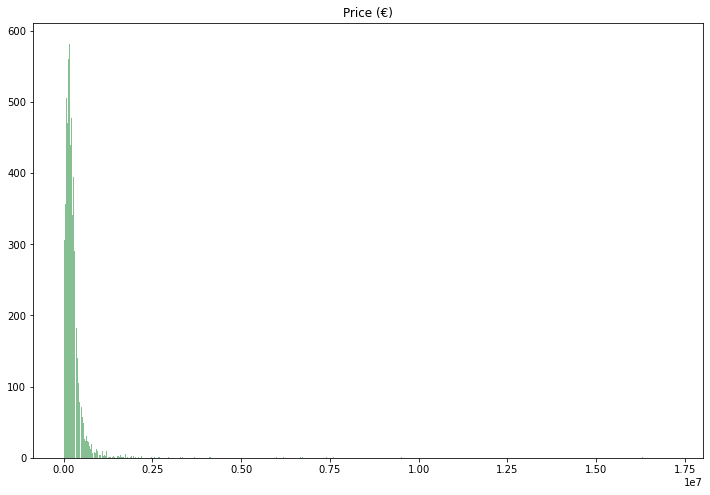

In [274]:
ax = df.hist(column='Price (€)', bins='auto', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax

AttributeError: 'Polygon' object has no property 'normed'

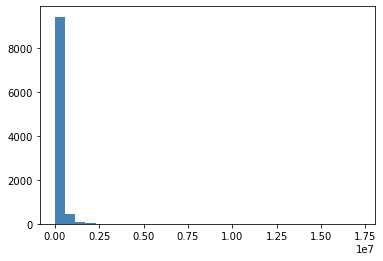

In [276]:
plt.hist(df['Price (€)'], bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
# ax = df.hist(column='Price (€)', bins='auto', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# ax

TypeError: unhashable type: 'numpy.ndarray'

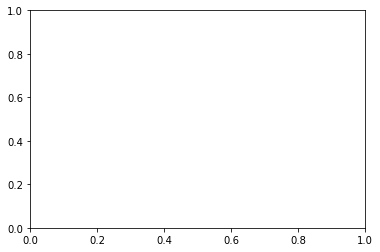

In [262]:
values = [numeric_columns]
strategy = [1,2,3,4,5,6,7,8,9,10]
value = np.array(values)
strategies = np.array(strategy)
plt.bar(strategy, values, .8)
plt.ylabel("Values")
plt.xlabel("Bin Number")
plt.title("Histogram")
plt.axis([1,11,0,2200000])
plt.show()

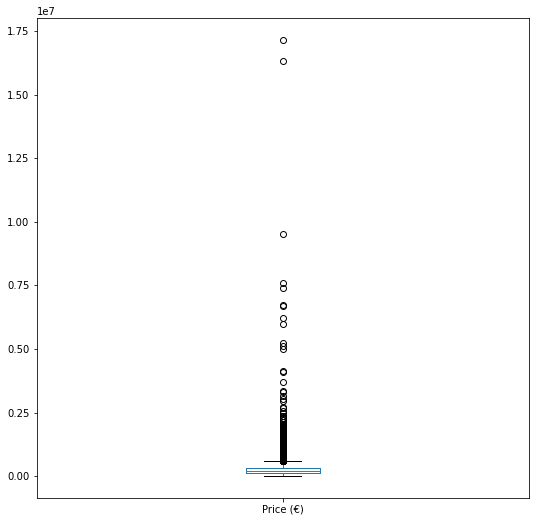

In [218]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

Bar Charts for All Catergotical Features

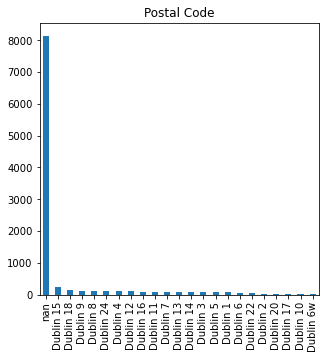

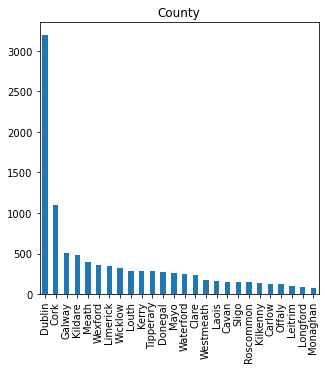

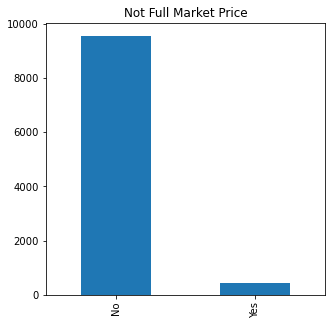

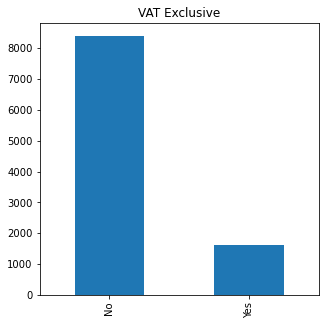

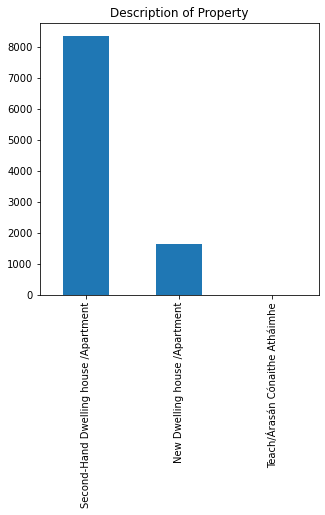

In [217]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('MotorInsurance-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf')

# We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# categorical features.
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()